<a href="https://colab.research.google.com/github/rahul-727/Computer-vision-lab-work/blob/main/2348544_CV_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread(r'C:\Users\krrah\Downloads\darkimage.jpg', 0)

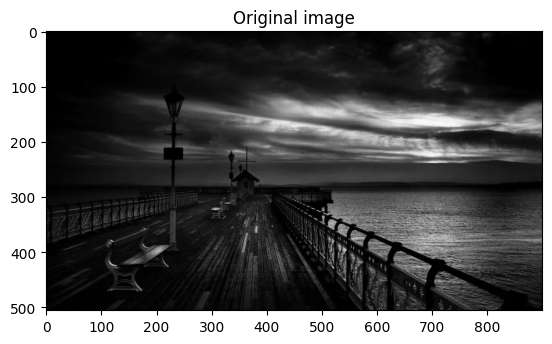

In [ ]:
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.show()

# Image Negative
Image Negative transforms the image by inverting the intensity levels within the image. For an 8-bit image, if the intensity of a pixel is I, its negative would be 255 - I.

there is no built-in function available for image negative

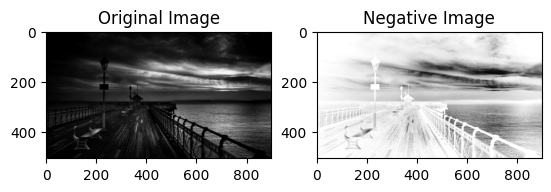

In [ ]:
def image_negative(image):
    return 255 - image


negative_image = image_negative(image)
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(negative_image, cmap='gray'), plt.title('Negative Image')
plt.show()

# Gray Level Slicing
Gray Level Slicing enhances a specific range of intensities in the image. This can be done in two ways: highlighting a range of intensities while preserving the background, or highlighting a range of intensities and darkening the rest.

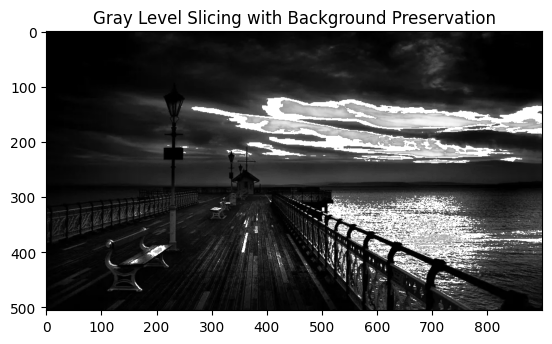

In [ ]:
def gray_level_slicing_preserve(image, lower_bound, upper_bound):
    result_image = image.copy()
    result_image[(image >= lower_bound) & (image <= upper_bound)] = 255
    return result_image

sliced_image = gray_level_slicing_preserve(image, 100, 150)

plt.imshow(sliced_image, cmap='gray')
plt.title('Gray Level Slicing with Background Preservation')
plt.show()

# Histogram Equalization
Histogram Equalization improves the contrast of an image by stretching out the most frequent intensity values.

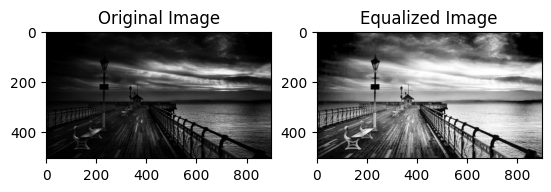

In [ ]:
# Built-in

equalized_image = cv2.equalizeHist(image)

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()

# User-defined function for histogram equalization

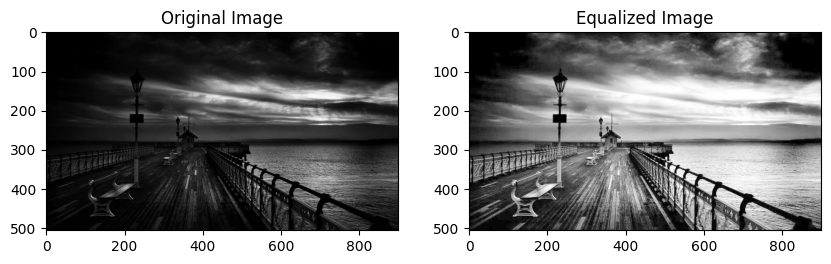

In [ ]:
def histogram_equalization(image):
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(histogram.max()) / cdf.max()

    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)

    return image_equalized.reshape(image.shape)

equalized_image = histogram_equalization(image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()
